<a href="https://colab.research.google.com/github/marinados03/mvp_pos_pucrio/blob/main/mvp_MarinaDuarte_MLand_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avaliação de clientes com relação à probabilidade de churn**

## **Introdução e Definição do problema**

#### **Contexto**
O churn é um indicador que mostra a quantidade de usuários que deixa de pagar e/ou utilizar um certo serviço/produto.

Acompanhar o churn de um serviço/produto é fundamental para verificar a saúde do mesmo, ajudando a entender taxas de crescimento, receita, satisfação, entre outros.

O churn aparece como métrica em diversos cenários, e em empresas dos mais diversos segmentos.

Um baixo churn é correspondente à uma alta taxa de retenção, ou seja, se um usuário realiza um churn, este deixa de ser um cliente e não foi retido. No meio corporativo, já utiliza-se mesmo frases como 'o usuário churnou' indicando que este usuário deixou de pagar/utilizar o serviço.

#### **Motivação**
Trabalhar com o tema de previsão de churn surge com o objetivo de gerar uma análise paralela de grande utilidade para o cenário da atual empresa de atuação (na qual não foi possível utilizar os dados reais).

Hoje, nesta empresa, existem planos de pagamento recorrente aos quais os usuários podem aderir e, mensalmente, pagar o valor proposto. Nesse contexto, os usuários são chamados de usuários profissionais.

A venda desses planos gera grande receita para a companhia, e por isso, deve-se sempre manter e/ou aumentar a base ativa de profissionais, sempre evitando que os usuários deixem o plano, ou seja, sejam um churn.

#### **Descrição do problema e premissas**
Entende-se que o churn é consequencia de diversos outros fatores, como por exemplo, características relacionadas ao usuário, performance do serviço, precificação, experiência, entre outros. Portanto, se forem verificados os itens corretos, seria possível prever se um usuário é um potencial churn ou não.

Para tanto, neste MVP serão avaliados diferentes **modelos supervisionados de classificação** para melhor atender o objetivo em questão.

**O objetivo final do modelo é direcionar descontos para usuários com potencial de churn de forma a tentar retê-lo**.


#### **Hipótese a ser avaliada**
É possível treinar um modelo de machine learning que consiga classificar usuários como potenciais churns (0 o usuário vai se manter como cliente / 1 o usuário vai sair).




## **Dataset utilizado**

Neste MVP foi utilizado o dataset 'Bank Customer Churn Dataset' obtido no site kaggle através do link https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data

Cada linha do dataset representa um cliente, designado por seu `customer_id`, de um banco. Diferentes características desses clientes são apresentadas como features e a coluna alvo é `churn`, onde recebe 1 se o cliente deixou o banco durante um certo período ou 0 se não.



#**Importação bibliotecas a serem utilizadas**

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#Imports principais para manipulação e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import os
import random

#import para execução de separação entre treino e teste, validação cruzada, seleção de features e otimização de hiperparametros
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.model_selection import GridSearchCV #para seleção de melhor resultado entre diversos hiperparametros


#imports de modelos de machine learning e exebição de métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay # para a exibição da métricas
from sklearn.metrics import classification_report # para report de classificação
from sklearn.metrics import confusion_matrix # para matriz confusão
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #algoritmos Random Forest e Gradiente Boosting
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

np.random.seed(99)
random.seed(99)


# **Importação do dataset e análise exploratória dos dados**




In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/marinados03/mvp_pos_pucrio/refs/heads/main/Bank%20Customer%20Churn%20Prediction.csv")

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dados importados sob forma de dataframe odo pandas, visulização das 5 primeiras linhas do dataset acima

In [3]:
df.shape

(10000, 12)

O dataset possui 10.000 registros e 12 colunas, sendo a ultima `churn` o alvo deste trabalho

In [4]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


O dataset não apresenta registros nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


O dataset apresenta, além do id do cliente, 9 atributos numéricos (int64, float64), nele considerando classes e contínuos, e 2 atributos de texto (object).

Portanto, é necessário transformar as variáveis categóricas em numéricas para serem utilizadas durante modelagem

In [6]:
df["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df["country"] = df["country"].map({"France": 1, "Spain": 2, "Germany": 3})

In [8]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df["gender"] = df["gender"].map({"Female": 1, "Male": 2})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


O novo dataset apresenta apenas variáveis numéricas, pois foram mapeados os valores distintos presentes em cada uma das colunas inicialmente de texto e transformados em valores numéricos.

In [11]:
df.describe()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,1.749500,1.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,1.000000,1.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,1.000000,1.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,1.000000,2.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,3.000000,2.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,3.000000,2.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Com o método describe, é possível entender de forma simples a distribuição dos dados, por exemplo, o score de credito apresenta média 650.5, com desvio de 96.7 e valores mínimos e máximos de 350.0 e 850.0, respectivamente. Também é possível verificar os diferentes quartis na tabela.

Agora, passaremos para o entendimento mais detalhado da variável target:

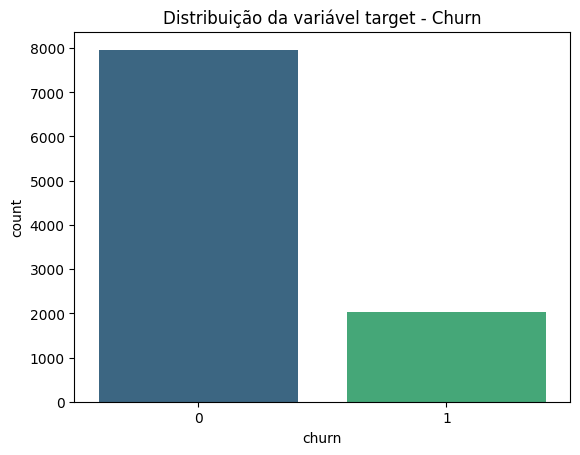

In [12]:
sns.countplot(x='churn', data=df, palette="viridis",label=True)
plt.title('Distribuição da variável target - Churn')
plt.show()

In [13]:
churn_counts = df['churn'].value_counts()
churn_percentages = df['churn'].value_counts(normalize=True) * 100

print("Churn Counts:\n", churn_counts)
print("\nChurn Percentages:\n", churn_percentages)

Churn Counts:
 churn
0    7963
1    2037
Name: count, dtype: int64

Churn Percentages:
 churn
0    79.63
1    20.37
Name: proportion, dtype: float64


Com isso, nota-se que o dataset é desbalanceado, possuindo 79.6% de registros de não churn. Esses valores devem ser considerados ao analisar as métricas dos modelos.

Em seguida, para verificar visualmente a distribuição dos atributos, será feita a separação entre variáveis numéricas e variáveis de classe

In [14]:
numeric_variables  = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
class_variables = ['country', 'gender', 'credit_card', 'active_member', 'products_number']

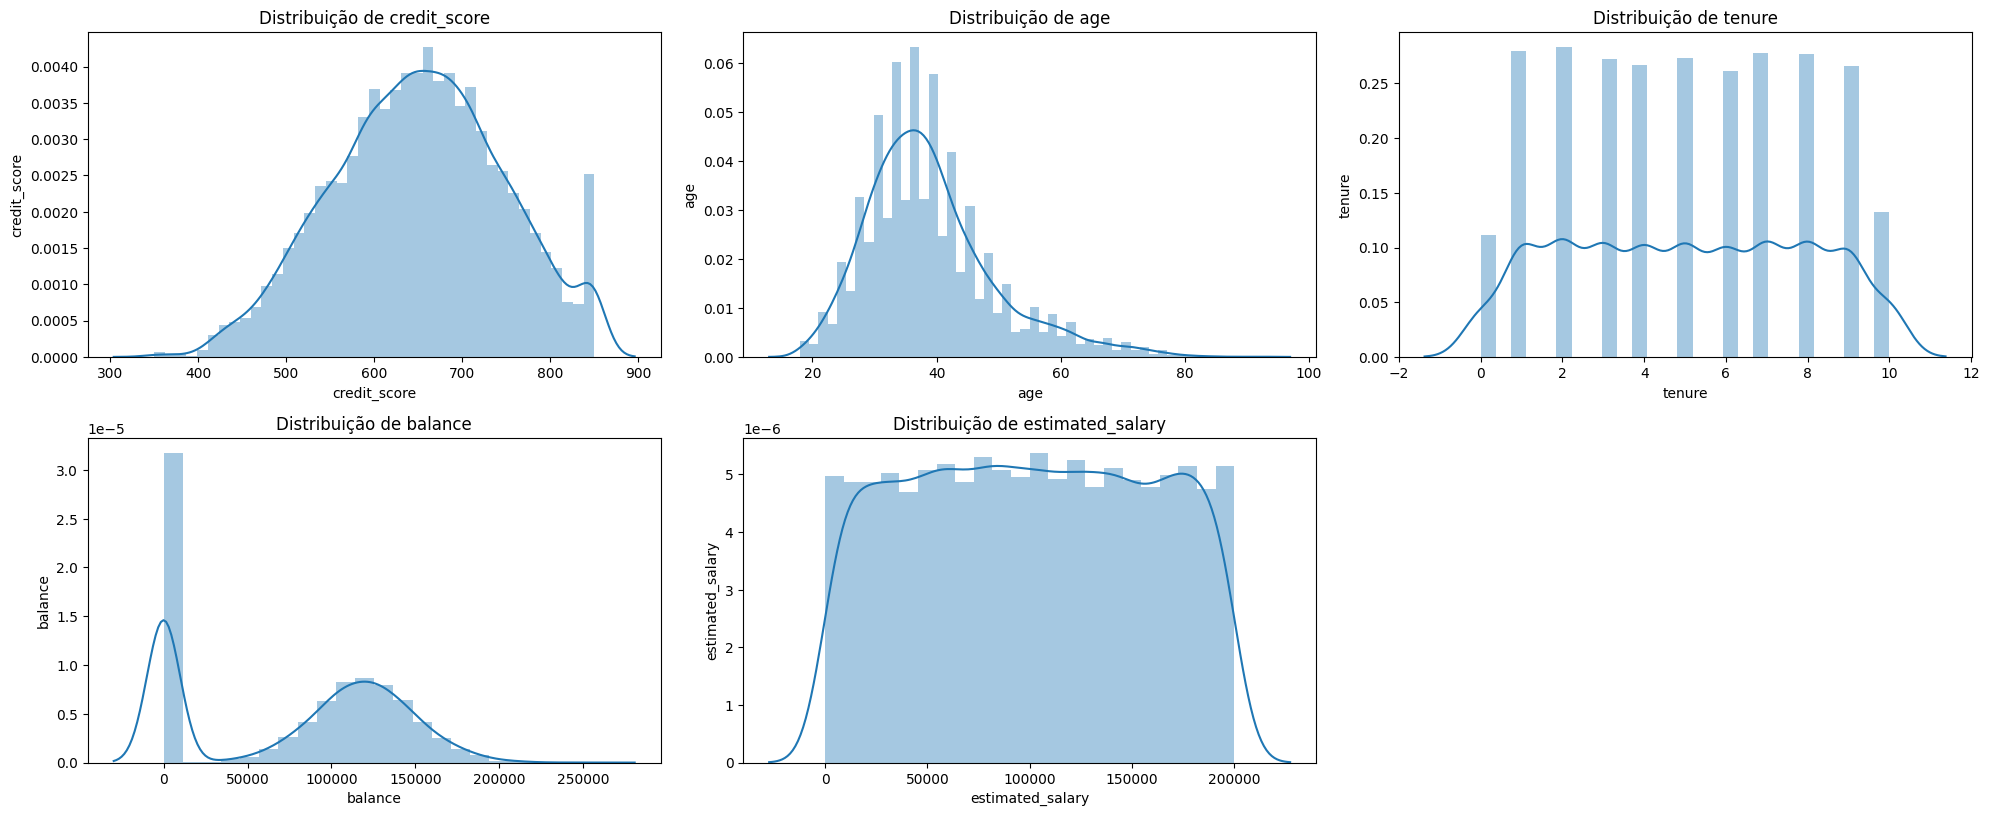

In [15]:
plt.figure(figsize=(20, 20))
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(5, 3, i)
    sns.distplot(df[var])
    plt.title(f'Distribuição de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Ao verificar as distribuições, observa-se que:


*   `credit_score` apresenta distribuição próxima à normal com corte em 850
*   `age` apresenta distriuição próxima à normal com centro em 38.9
*   `tenure` e `estimated-salary` apresentam distribuição linear
*   `balance` apresenta distribuição normal para dados exceto 0, que apresentam alta frequencia.










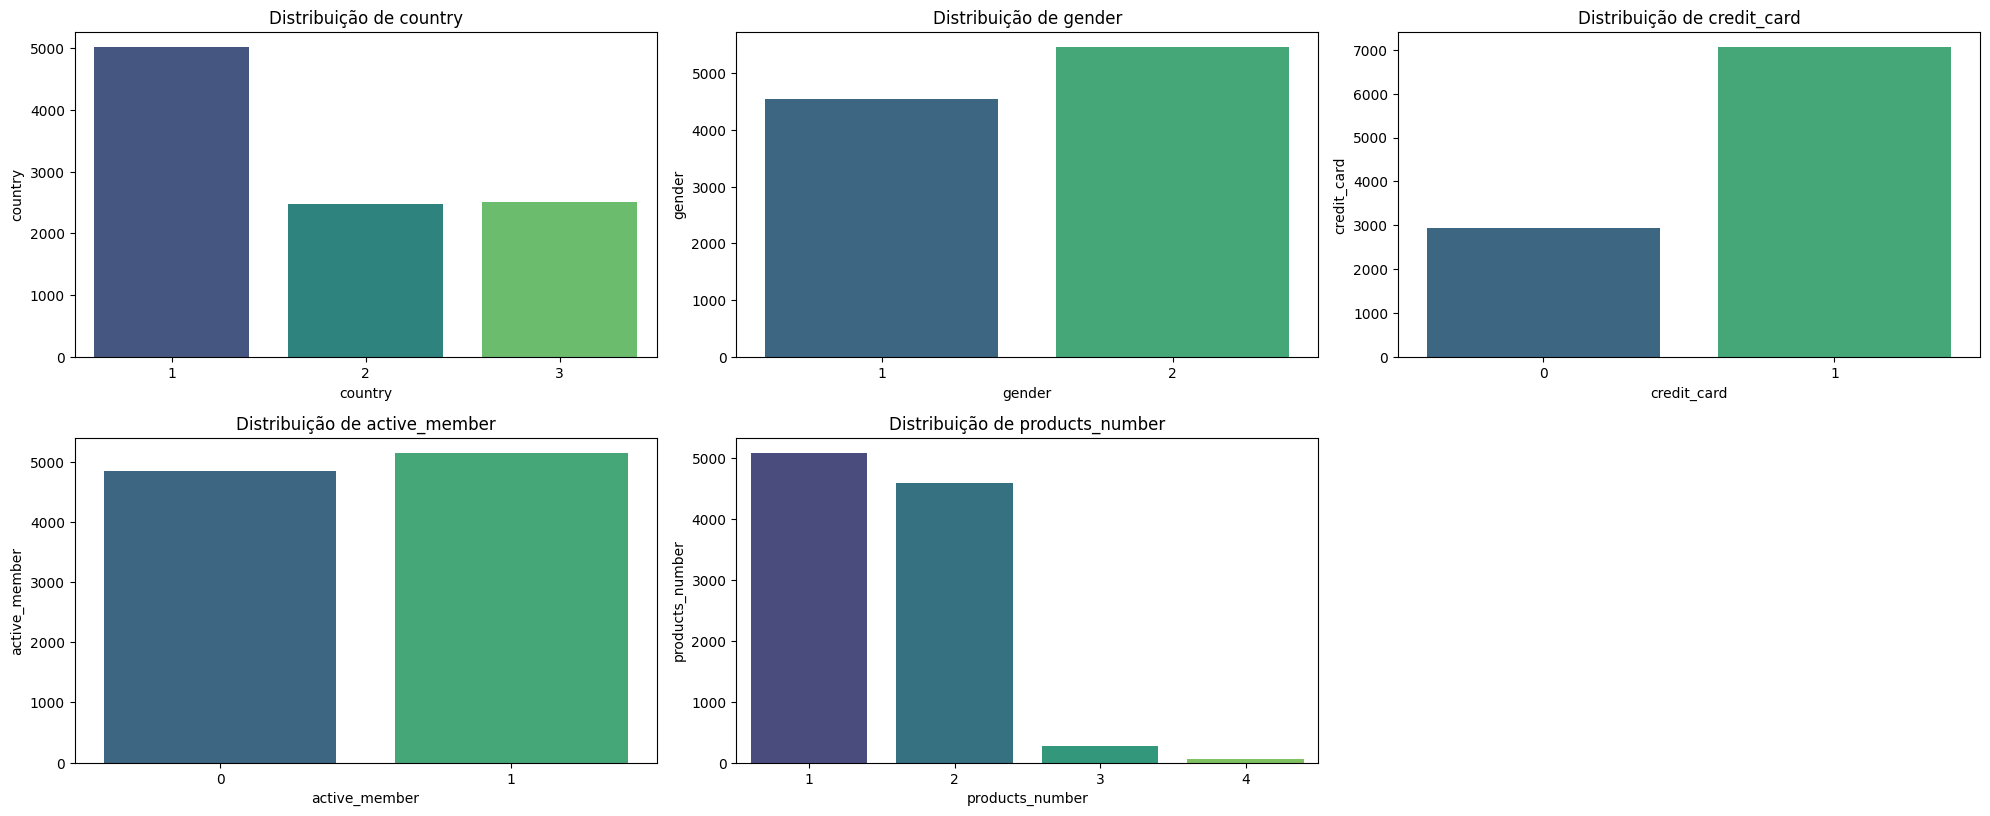

In [16]:
plt.figure(figsize=(20, 20))
for i, var in enumerate(class_variables, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=df[var], data=df, palette="viridis")
    plt.title(f'Distribuição de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# **Preparação dos dados e Modelagem inicial**

Considerando v0 a versão inicial de avaliação, sem seleção de features nem otimização de parâmetros

In [17]:
# Separação em bases de treino e teste (holdout)
array = df.values
X0 = array[:,1:11] # atributos (desconsiderando o consumer_id que é um index)
y0 = array[:,11] # classe (target)

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.20, random_state=7) # faz a divisão deixando 20% da base para teste

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold0 = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [18]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models_v0 = []
accuracy_v0 = []
precision_v0 = []
recall_v0 = []
names_v0 = []

# Preparando os modelos e adicionando-os em uma lista
models_v0.append(('KNN', KNeighborsClassifier()))
models_v0.append(('CART', DecisionTreeClassifier()))
models_v0.append(('RF', RandomForestClassifier()))
models_v0.append(('GB', GradientBoostingClassifier()))
models_v0.append(('NB', GaussianNB()))
models_v0.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models_v0:
  accuracy_results = cross_val_score(model, X0_train, y0_train, cv=kfold0, scoring='accuracy')
  precision_results = cross_val_score(model, X0_train, y0_train, cv=kfold0, scoring='precision')
  recall_results = cross_val_score(model, X0_train, y0_train, cv=kfold0, scoring='recall')
  accuracy_v0.append(accuracy_results)
  precision_v0.append(precision_results)
  recall_v0.append(recall_results)
  names_v0.append(name)
  msg_accuracy = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
  msg_precision = "%s: %f (%f)" % (name, precision_results.mean(), precision_results.std())
  msg_recall = "%s: %f (%f)" % (name, recall_results.mean(), recall_results.std())
  print('Acurácia - ', msg_accuracy)
  print('Precisão - ', msg_precision)
  print('Recall - ', msg_recall)

Acurácia -  KNN: 0.758875 (0.008090)
Precisão -  KNN: 0.229871 (0.045402)
Recall -  KNN: 0.077448 (0.012459)
Acurácia -  CART: 0.786375 (0.010007)
Precisão -  CART: 0.487885 (0.018794)
Recall -  CART: 0.523969 (0.023280)
Acurácia -  RF: 0.862125 (0.012563)
Precisão -  RF: 0.769246 (0.039391)
Recall -  RF: 0.472231 (0.032179)
Acurácia -  GB: 0.865125 (0.011864)
Precisão -  GB: 0.777091 (0.037760)
Recall -  GB: 0.471406 (0.028411)
Acurácia -  NB: 0.785125 (0.010975)
Precisão -  NB: 0.355336 (0.077948)
Recall -  NB: 0.071033 (0.016857)
Acurácia -  SVM: 0.796750 (0.012415)
Precisão -  SVM: 0.000000 (0.000000)
Recall -  SVM: 0.000000 (0.000000)


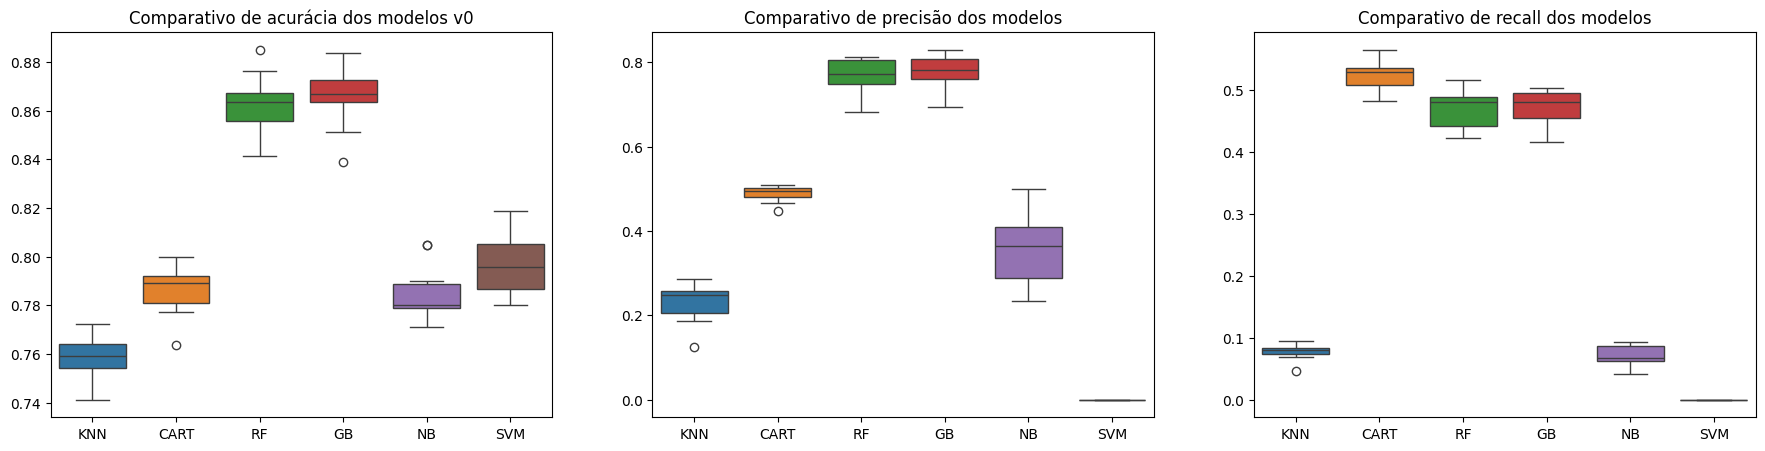

In [20]:
# Boxplot de comparação dos modelos

plt.figure(figsize = ((22, 5)))

plt.subplot(1,3,1)
plt.title("Comparativo de acurácia dos modelos v0", fontsize = 12)
plt.xticks(ticks=range(len(names_v0)),labels=names_v0)
sns.boxplot(accuracy_v0)

plt.subplot(1,3,2)
plt.title("Comparativo de precisão dos modelos", fontsize = 12)
plt.xticks(ticks=range(len(names_v0)),labels=names_v0)
sns.boxplot(precision_v0)

plt.subplot(1,3,3)
plt.title("Comparativo de recall dos modelos", fontsize = 12)
plt.xticks(ticks=range(len(names_v0)),labels=names_v0)
sns.boxplot(recall_v0)

plt.show()

Acima, foram plotados os gráficos boxplots para comparação entre os modelos avaliados (dados exatos estão presentes logo acima). Para avaliação foram verificadas as métricas de acurácia, precisão e recall.

Como o objetivo é dar descontos para usuários com probabilidade de churn, é interessante que a precisão seja boa de modo a não dar descontos para usuários que já se manteriam no banco e que o recall também seja bom, de modo a atuar na maior quantidade de usuários com probabilidade de saída.

Ao avaliar as métricas iniciais, os modelos KNN, , GaussianNB e SVM, apresentam baixa precisão e recall, podendo ser descartados para uso nesse momento.

É interessante notar que o modelo de árvore de decisão (CART) apresenta recall um pouco mais alto que os demais, mas com o fato da precisão ser consideravelmente mais baixa, também será descartado de modo a evitar perda de receita por grande quantidade de oferta de descontos.

O modelo Random Forest e Gradient Boosting apresentam melhor performance, tanto em precisão quanto em recall. Dentre eles, o **Gradient Boosting** é levemente superior. Portanto, este seria a opção para dar prosseguimento ao projeto após avaliação desses dados.




#**Testando método de seleção de features e nova avaliação dos modelos**


 É sabido que o excesso de features para treinamento de um modelo pode ser um problema, causando dificuldades no aprendizado de padrões e piorando o tempo de processamento.

 Portanto, antes de seguir com o modelo Gradient Boosting selecionado acima. Será realizada uma seleção de features através do método de seleção dos K melhores e verificação das mesmas métricas para os modelos.


In [21]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X0, y0)

# Reduz X para os atributos selecionados
features = fit.transform(X0)

# Resultados
print('\nNúmero original de atributos:', X0.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df.columns[1:11])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=2) # 2 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df.columns[1:11]))


Número original de atributos: 10

Número reduzido de atributos: 4

Atributos Originais: Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

Scores dos Atributos Originais: [7.34e+00 2.42e+02 1.15e+02 8.86e+02 1.96e+00 1.42e+02 2.29e+01 5.09e-01
 2.50e+02 1.46e+00]

Atributos Selecionados: ['country' 'age' 'balance' 'active_member']


A seleção de atributos selecionou 4 atributos `country`, `age`, `balance` e `active_member` como mais relevantes, portanto, serão treinados novos modelos utilizando apenas esses dados para avaliação

In [22]:
df_feature_selected = df[['country', 'age', 'balance', 'active_member', 'churn']]

In [23]:
df_feature_selected.shape

(10000, 5)

In [24]:
# Separação em bases de treino e teste (holdout)
array = df_feature_selected.values
X1 = array[:,0:4] # atributos
y1 = array[:,4] # classe (target)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=7) # faz a divisão deixando 20% da base para teste

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold1 = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [25]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models_v1 = []
accuracy_v1 = []
precision_v1 = []
recall_v1 = []
names_v1 = []

# Preparando os modelos e adicionando-os em uma lista
models_v1.append(('KNN', KNeighborsClassifier()))
models_v1.append(('CART', DecisionTreeClassifier()))
models_v1.append(('RF', RandomForestClassifier()))
models_v1.append(('GB', GradientBoostingClassifier()))
models_v1.append(('NB', GaussianNB()))
models_v1.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models_v1:
  accuracy_results_v1 = cross_val_score(model, X1_train, y1_train, cv=kfold1, scoring='accuracy')
  precision_results_v1 = cross_val_score(model, X1_train, y1_train, cv=kfold1, scoring='precision')
  recall_results_v1 = cross_val_score(model, X1_train, y1_train, cv=kfold1, scoring='recall')
  accuracy_v1.append(accuracy_results_v1)
  precision_v1.append(precision_results_v1)
  recall_v1.append(recall_results_v1)
  names_v1.append(name)
  msg_accuracy_v1 = "%s: %f (%f)" % (name, accuracy_results_v1.mean(), accuracy_results_v1.std())
  msg_precision_v1 = "%s: %f (%f)" % (name, precision_results_v1.mean(), precision_results_v1.std())
  msg_recall_v1 = "%s: %f (%f)" % (name, recall_results_v1.mean(), recall_results_v1.std())
  print('Acurácia - ', msg_accuracy_v1)
  print('Precisão - ', msg_precision_v1)
  print('Recall - ', msg_recall_v1)

Acurácia -  KNN: 0.775750 (0.012352)
Precisão -  KNN: 0.363893 (0.070475)
Recall -  KNN: 0.135672 (0.026097)
Acurácia -  CART: 0.781125 (0.009706)
Precisão -  CART: 0.451615 (0.026752)
Recall -  CART: 0.386600 (0.024927)
Acurácia -  RF: 0.806000 (0.012372)
Precisão -  RF: 0.534733 (0.031187)
Recall -  RF: 0.379554 (0.032189)
Acurácia -  GB: 0.837875 (0.010125)
Precisão -  GB: 0.715193 (0.049590)
Recall -  GB: 0.340164 (0.029042)
Acurácia -  NB: 0.782500 (0.010607)
Precisão -  NB: 0.335938 (0.088561)
Recall -  NB: 0.072888 (0.020664)
Acurácia -  SVM: 0.796750 (0.012415)
Precisão -  SVM: 0.000000 (0.000000)
Recall -  SVM: 0.000000 (0.000000)


Os modelos RandomForest e GrandientBoosting seguem apresentando melhor performance dentro os avaliados. Nesse caso também, o GradientBoosting é levemente superior.

Entretanto, anteriormente à seleção de atributos, o GradientBoosting apresentou acurácia de 86,5% e, nesse momento, uma leve redução para 83,8%.

Logo, **seguiremos com o modelo Grandient Boosting sem seleção de atributos**, de modo a priorizar a performance do modelo e uma vez que o processamento está aceitável em ambos os casos

#**Otimização do modelo selecionado**


Serão utilizados diferentes hiperparâmetros no modelo GradientBoosting de modo a verificar se existe um resultado melhor para o mesmo. A métrica utilizada vai ser acurácia, pois, como visto até então, representou bem no comparativo.

In [27]:
#essa etapa demanda mais tempo para execução (por volta de 9min)

param_grid = {
    'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [1, 2, 3, 4, 5, 10, 15]
}

gb2 = GradientBoostingClassifier(random_state=99)

grid_search = GridSearchCV(estimator=gb2, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X0_train, y0_train)

print("Melhor Score:", grid_search.best_score_)
print("Melhores Parâmetros:", grid_search.best_params_)

best_gb = grid_search.best_estimator_
best_gb_pred = best_gb.predict(X0_test)

print("Melhor Modelo (Gradient Boosting):")
print(classification_report(y0_test, best_gb_pred))

Melhor Score: 0.863750995866702
Melhores Parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhor Modelo (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1589
         1.0       0.77      0.47      0.58       411

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Mesmo com os novos parâmetros avaliados, o resultado ficou muito próximo, até levemente inferior ao treino inicial. Logo, para aplicação em produção, será utilizado o primeiro modelo treinado.

#**Criação do modelo com toda a base e Avalição final do resultado**

In [28]:
# Criando um modelo com todo o conjunto de treino
model = GradientBoostingClassifier(random_state=99)
model.fit(X0_train, y0_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X0_test)

# Estimando a acurácia no conjunto de teste
print('Acurácia - ', accuracy_score(y0_test, predictions))
print('Precisão - ', precision_score(y0_test, predictions))
print('Recall - ', recall_score(y0_test, predictions))

Acurácia -  0.862
Precisão -  0.766798418972332
Recall -  0.4720194647201946


In [29]:
# Criando um modelo com todo o dataset
model_final = GradientBoostingClassifier(random_state=99)
model_final.fit(X0, y0)

# Fazendo as predições com todo o dataset
predictions = model_final.predict(X0)

# Estimando a acurácia no dataset
print('Acurácia - ', accuracy_score(y0, predictions))
print('Precisão - ', precision_score(y0, predictions))
print('Recall - ', recall_score(y0, predictions))



Acurácia -  0.8728
Precisão -  0.8067361668003208
Recall -  0.49386352479135986


Logo, o modelo final apresentou um resultado ainda melhor do que na base de treino, apresentando:

*   **Acurácia - 87,3%**
*   Precisão - 80,7%
*   Recall - 49,4%

Ou seja, na aplicação em produção, de todos os descontos oferecidos, 80,7% estariam sendo dados para os clientes que realmente realizariam churn.
De todos os clientes que realizariam churn, 49,4% seriam impactados pela ação de descontos.





#**Exemplo de aplicação no negócio**

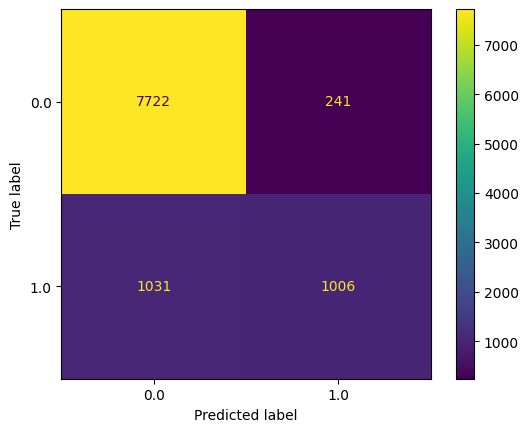

In [30]:
#Plotando matrix confusão com dados de todo o dataset

cm = confusion_matrix(y0, predictions, labels=model_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_final.classes_)
disp.plot()

plt.show()

Considerando a proposta inicial de oferecer descontos para clientes classificados como '`churn`', consideraríamos os:

*   VN - 7722 - clientes que não iriam ser churn e, corretamente, não irão ter desconto oferecido.
*   VP - 1006 - clientes que iriam ser churn e, corretamente, recebem a opção de desconto no pagamento, com o objetivo de reter parte desse público, evitando sua saída.
*   FN - 1031 - clientes que seriam churn, porém foram incorretamente avaliados como não churn, portanto, esses clientes não iriam ver os descontos, sendo uma perda real sem reversão. Esses já seriam perdidos sem a modelagem.
*   FP - 241 - clientes que não seriam churn e, incorretamente, recebem desconto. Logo, considera-se que todos esses aceitariam o desconto, uma vez que já pagariam o valor cheio.





Dado o cenário, é possível definir algumas premissas de modo a entender o possível ganho do modelo num cenário real:
- Iniciamos com 10.000 clientes no banco
- Todo mês, mais 10.000 clientes entram no banco
- Taxa de churn base observada no dataset: 20,37%
- Valor cheio pago pelo cliente: 150 reais
- Valor com desconto pago pelo cliente que é classificado como 'churn': 127,50 reais (-15%)
- Taxa de aceitação do desconto (reversão de churn): 80%

Com isso, teríamos o seguinte cenário:




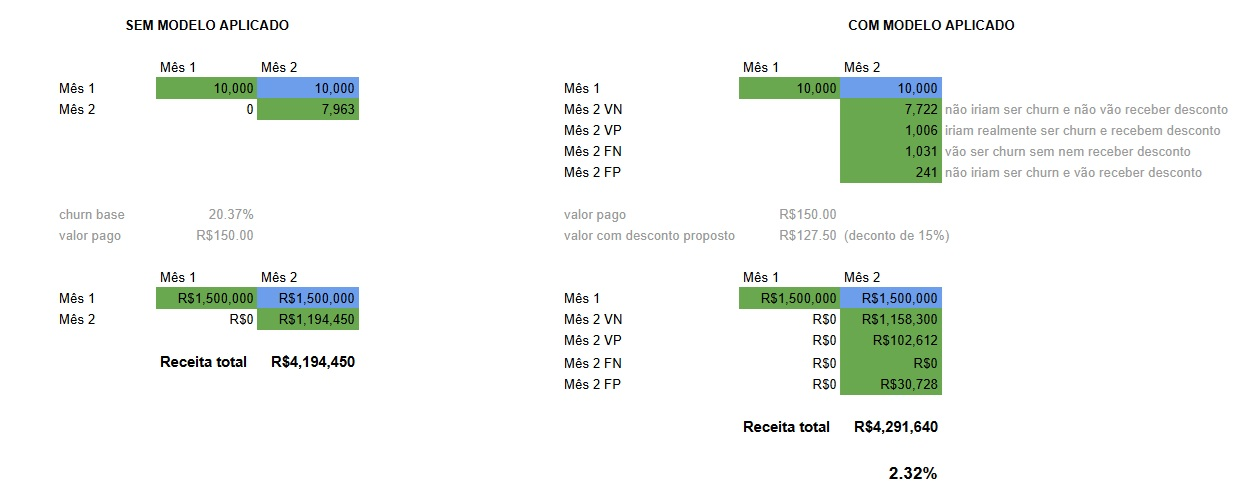

Logo, em 2 meses, com essas premissas, seria observado um incremento de **+2,32% em receita**, que poderia ser ainda maior se os clientes retidos se mantivessem por mais meses (retenção e recorrência).

É claro que, se consideramos outras premissas, teremos outros resultados, por exemplo, uma taxa de retenção de 50% de usuários que viram o desconto levaria a uma aumento de apenas +1,40% de receita.

# **Considerações Finais**

Foi utilizada uma base de dados de **características de clientes de um dado banco e sua classificação em churn ou não**. Esse tema foi selecionado por ser paralelo à problemas que ocorrem no meu atual trabalho.

Foi realizada uma **análise exploratória de dados** com o ojetivo de entender melhor cada um dos atributos e a variável target (churn).

Em seguida, foi realizada a **preparação dos dados, com separação de base de treino e teste e preparação para utilização do método de validação cruzada**. Foram selecionadas as métricas de **acurácia, precisão e recall** para avaliar diferentes modelos de classificação. O modelo com melhor performance para a base de dados em questão foi o **GradientBoosting**.

Também foi avaliado se um método de seleção de features seria interessante para o caso, assim como, a otimização de hiperparâmetros. Ambos os casos apresentaram resultados inferiores ao inicial.

Portanto, foi utilizado o modelo de GradientBoosting inicial, que apresentou uma **acurácia de 87,3%** no dataset total.

Por último, foi apresentada uma aplicação dos resultados para o objetivo inicial de solução do problema a partir de algumas premissas, provando que o modelo selecionado seria capaz de levar a um **aumento de receita** ao ser aplicado em produção.

O resultado obtido foi interessante para o problema apresentado, como próximos passos, faria sentido um teste em produção para obtenção de resultados empíricos no lugar de premissas e verificação do ganho real.

